## Load dataset

In [1]:
import pandas as pd

df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## ETL pipeline
### Extract data from csv files
- Load data into dataframe
- Extract metadata
### Transform data
- fill_missing(df=df, columns=["bmi"])
- drop_match_values(df=df, column="gender", value="Other")
- drop_columns(df=df, columns=["id"])
- reformat_type(df=df, columns=["age"], type="int64")
### Load data into database
- Split dataframe into train and test
- Save csv files

In [2]:
!python extract_transform_load/pipeline.py

2023-09-23 20:20:44,663 - extract_transform_load.extract - INFO - Reading file from data/healthcare-dataset-stroke-data.csv
2023-09-23 20:20:44,675 - extract_transform_load.extract - INFO - Extracting metadata
2023-09-23 20:20:44,678 - extract_transform_load.extract - INFO - Metadata: {'file_path': 'data/healthcare-dataset-stroke-data.csv', 'shape': (5110, 12), 'columns': ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'], 'dtypes': {'id': dtype('int64'), 'gender': dtype('O'), 'age': dtype('float64'), 'hypertension': dtype('int64'), 'heart_disease': dtype('int64'), 'ever_married': dtype('O'), 'work_type': dtype('O'), 'Residence_type': dtype('O'), 'avg_glucose_level': dtype('float64'), 'bmi': dtype('float64'), 'smoking_status': dtype('O'), 'stroke': dtype('int64')}, 'category_columns': [], 'numeric_columns': ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi

## Load preprocessed data

In [3]:
df_train = pd.read_csv('data/df_train_preprocess.csv')
print(df_train)

df_test = pd.read_csv('data/df_test_preprocess.csv')
print(df_test)


      gender  age  hypertension  heart_disease ever_married      work_type  \
0       Male   43             0              0          Yes  Self-employed   
1     Female   76             1              1          Yes        Private   
2       Male   78             0              1          Yes        Private   
3     Female   52             0              0          Yes  Self-employed   
4     Female   72             1              1          Yes        Private   
...      ...  ...           ...            ...          ...            ...   
4811  Female   69             1              1           No  Self-employed   
4812  Female   57             0              1          Yes        Private   
4813    Male   81             1              1          Yes        Private   
4814    Male   78             0              0          Yes        Private   
4815    Male   64             0              1          Yes        Private   

     Residence_type  avg_glucose_level    bmi   smoking_status 

## Feature engineering
### Standardize & label encode
- Standardize numerical features
- Label encode categorical features
### SMOTE oversampling
### Feature selection

In [4]:
!python feature_engineering/pipeline.py

2023-09-23 20:24:30,992 - feature_engineering.standardlize - INFO - Standardizing ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
2023-09-23 20:24:31,001 - feature_engineering.standardlize - INFO - Label encoding ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
2023-09-23 20:24:31,076 - feature_engineering.standardlize - INFO - Standardizing ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
2023-09-23 20:24:31,087 - feature_engineering.standardlize - INFO - Label encoding ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
2023-09-23 20:24:31,096 - feature_engineering.smote - INFO - Balancing data with target class stroke
2023-09-23 20:24:35,801 - feature_engineering.feature_selection - INFO - 7 important features
2023-09-23 20:24:35,801 - feature_engineering.feature_selection - INFO - Index(['gender', 'age', 'hypertension', 'work_type', 'avg_glucose_level',
       'bmi', 'smoking_status'],
     

## Load feature engineered data

In [7]:
df_train = pd.read_csv('data/df_train_feature_engineering.csv')
print(df_train)

df_test = pd.read_csv('data/df_test_feature_engineering.csv')
print(df_test)

      gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1 -0.001744     -0.326913      -0.236940             1          3   
1          0  1.456823      3.058920       4.220486             1          2   
2          1  1.545221     -0.326913       4.220486             1          2   
3          0  0.396047     -0.326913      -0.236940             1          3   
4          0  1.280027      3.058920       4.220486             1          2   
...      ...       ...           ...            ...           ...        ...   
4811       0  1.147430      3.058920       4.220486             0          3   
4812       0  0.617042     -0.326913       4.220486             1          2   
4813       1  1.677818      3.058920       4.220486             1          2   
4814       1  1.545221     -0.326913      -0.236940             1          2   
4815       1  0.926435     -0.326913       4.220486             1          2   

      Residence_type  avg_glucose_level

[Text(0.5, 1.0, 'Stroke Distribution in Train Data')]

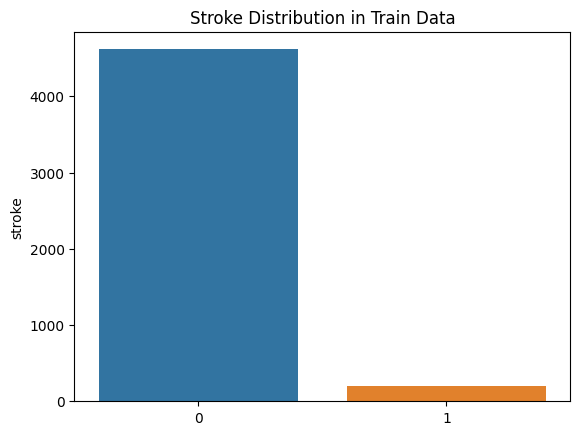

In [11]:
import seaborn as sns

sns.barplot(x=df_train.stroke.value_counts().index, y=df_train.stroke.value_counts()).set(title='Stroke Distribution in Train Data')


[Text(0.5, 1.0, 'Stroke Distribution in Test Data')]

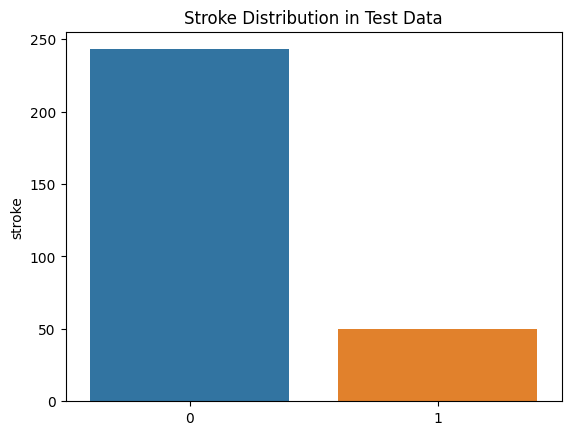

In [12]:
sns.barplot(x=df_test.stroke.value_counts().index, y=df_test.stroke.value_counts()).set(title='Stroke Distribution in Test Data')

In [14]:
df_train_selection_smote = pd.read_csv('data/df_train_feature_engineering_smote_selection.csv')
print(df_train_selection_smote)

      gender       age  hypertension  work_type  avg_glucose_level       bmi  \
0          1 -0.001744     -0.326913          3          -0.148317  0.208834   
1          0  1.456823      3.058920          2          -0.083058  0.273361   
2          1  1.545221     -0.326913          2           0.873554 -0.268665   
3          0  0.396047     -0.326913          3          -0.361244 -0.178327   
4          0  1.280027      3.058920          2           2.060465  0.312078   
...      ...       ...           ...        ...                ...       ...   
9229       1  1.454538     -0.326913          2           3.096170  0.168746   
9230       0  0.733505     -0.326913          2          -0.965646 -0.069380   
9231       0  1.487272     -0.326913          3           1.163828  0.071241   
9232       1  0.796946      2.939865          2           0.209386  1.095222   
9233       1  0.597087     -0.326913          2          -0.442576  0.063706   

      smoking_status  stroke  
0       

[Text(0.5, 1.0, 'Stroke Distribution in Train Data with SMOTE and Feature Selection')]

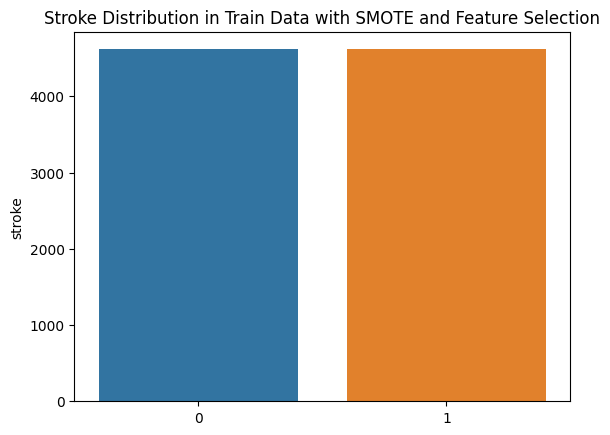

In [15]:
sns.barplot(x=df_train_selection_smote.stroke.value_counts().index, y=df_train_selection_smote.stroke.value_counts()).set(title='Stroke Distribution in Train Data with SMOTE and Feature Selection')

## Hyperparameter tuning
See details in `training/sagemaker-hyperparameter-tuning.ipynb`

## Train model

### Logistic regression without SMOTE and feature selection

In [22]:
!python training/train_model_lr.py \
    --training-input data/df_train_feature_engineering.csv \
    --test-input data/df_test_feature_engineering.csv \
    --model-output-dir models


2023-09-23 20:50:53,084 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 20:50:53,173 - __main__ - INFO - Fold 1: Accuracy=95.954% | F1-score=0.000% | AUC=0.500
2023-09-23 20:50:53,256 - __main__ - INFO - Fold 2: Accuracy=96.781% | F1-score=0.000% | AUC=0.500
2023-09-23 20:50:53,345 - __main__ - INFO - Fold 3: Accuracy=96.262% | F1-score=0.000% | AUC=0.500
2023-09-23 20:50:53,410 - __main__ - INFO - Fold 4: Accuracy=94.393% | F1-score=0.000% | AUC=0.500
2023-09-23 20:50:53,464 - __main__ - INFO - Fold 5: Accuracy=95.950% | F1-score=0.000% | AUC=0.500
2023-09-23 20:50:53,465 - __main__ - INFO - CV Accuracy: Mean 95.868% & STD 0.797%
2023-09-23 20:50:53,465 - __main__ - INFO - CV F1-score: Mean 0.000% & STD  0.000%
2023-09-23 20:50:53,465 - __main__ - INFO - CV AUC: Mean 0.500 & STD  0.000
2023-09-23 20:50:53,547 - __main__ - INFO - test set - Accuracy : 82.935%
2023-09-23 20:50:53,548 - __main__ - INFO - test set - F1-score : 0.000%
2023-09-23 20:50:53,548 - __main__ - INF

### Logistic regression with SMOTE and feature selection

In [27]:
!python training/train_model_lr.py \
    --training-input data/df_train_feature_engineering_smote_selection.csv \
    --test-input data/df_test_feature_engineering_selection.csv \
    --model-output-dir models

2023-09-23 20:58:28,721 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 20:58:28,756 - __main__ - INFO - Fold 1: Accuracy=79.805% | F1-score=80.296% | AUC=0.798
2023-09-23 20:58:28,786 - __main__ - INFO - Fold 2: Accuracy=79.372% | F1-score=80.330% | AUC=0.793
2023-09-23 20:58:28,815 - __main__ - INFO - Fold 3: Accuracy=78.506% | F1-score=79.377% | AUC=0.786
2023-09-23 20:58:28,848 - __main__ - INFO - Fold 4: Accuracy=78.831% | F1-score=79.497% | AUC=0.789
2023-09-23 20:58:28,876 - __main__ - INFO - Fold 5: Accuracy=78.873% | F1-score=79.938% | AUC=0.788
2023-09-23 20:58:28,877 - __main__ - INFO - CV Accuracy: Mean 79.077% & STD 0.457%
2023-09-23 20:58:28,877 - __main__ - INFO - CV F1-score: Mean 79.888% & STD  0.395%
2023-09-23 20:58:28,877 - __main__ - INFO - CV AUC: Mean 0.791 & STD  0.005
2023-09-23 20:58:28,910 - __main__ - INFO - test set - Accuracy : 78.840%
2023-09-23 20:58:28,910 - __main__ - INFO - test set - F1-score : 56.338%
2023-09-23 20:58:28,910 - __main_

### Random forest without SMOTE and feature selection

In [28]:
!python training/train_model_rf.py \
    --training-input data/df_train_feature_engineering.csv \
    --test-input data/df_test_feature_engineering.csv \
    --model-output-dir models

2023-09-23 20:58:34,836 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 20:58:35,273 - __main__ - INFO - Fold 1: Accuracy=95.851% | F1-score=4.762% | AUC=0.512
2023-09-23 20:58:35,697 - __main__ - INFO - Fold 2: Accuracy=96.677% | F1-score=0.000% | AUC=0.499
2023-09-23 20:58:36,087 - __main__ - INFO - Fold 3: Accuracy=96.262% | F1-score=5.263% | AUC=0.513
2023-09-23 20:58:36,443 - __main__ - INFO - Fold 4: Accuracy=94.289% | F1-score=0.000% | AUC=0.499
2023-09-23 20:58:36,808 - __main__ - INFO - Fold 5: Accuracy=95.950% | F1-score=0.000% | AUC=0.500
2023-09-23 20:58:36,808 - __main__ - INFO - CV Accuracy: Mean 95.806% & STD 0.811%
2023-09-23 20:58:36,808 - __main__ - INFO - CV F1-score: Mean 2.005% & STD  2.461%
2023-09-23 20:58:36,809 - __main__ - INFO - CV AUC: Mean 0.505 & STD  0.006
2023-09-23 20:58:37,230 - __main__ - INFO - test set - Accuracy : 82.935%
2023-09-23 20:58:37,230 - __main__ - INFO - test set - F1-score : 0.000%
2023-09-23 20:58:37,230 - __main__ - INF

### Random forest with SMOTE and feature selection

In [35]:
!python training/train_model_rf.py \
    --training-input data/df_train_feature_engineering_smote_selection.csv \
    --test-input data/df_test_feature_engineering_selection.csv \
    --model-output-dir models

2023-09-23 21:05:54,455 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 21:05:54,901 - __main__ - INFO - Fold 1: Accuracy=81.971% | F1-score=83.292% | AUC=0.821
2023-09-23 21:05:55,343 - __main__ - INFO - Fold 2: Accuracy=82.566% | F1-score=84.138% | AUC=0.824
2023-09-23 21:05:55,789 - __main__ - INFO - Fold 3: Accuracy=81.050% | F1-score=82.587% | AUC=0.811
2023-09-23 21:05:56,302 - __main__ - INFO - Fold 4: Accuracy=81.700% | F1-score=83.066% | AUC=0.818
2023-09-23 21:05:56,776 - __main__ - INFO - Fold 5: Accuracy=82.124% | F1-score=83.680% | AUC=0.821
2023-09-23 21:05:56,777 - __main__ - INFO - CV Accuracy: Mean 81.882% & STD 0.502%
2023-09-23 21:05:56,777 - __main__ - INFO - CV F1-score: Mean 83.352% & STD  0.528%
2023-09-23 21:05:56,777 - __main__ - INFO - CV AUC: Mean 0.819 & STD  0.004
2023-09-23 21:05:57,274 - __main__ - INFO - test set - Accuracy : 76.451%
2023-09-23 21:05:57,274 - __main__ - INFO - test set - F1-score : 54.902%
2023-09-23 21:05:57,274 - __main_

### Random forest with SMOTE and feature selection and hyperparameter tuning
![hyperparameter-tuning](images/rf-hp-tuning.png)

In [36]:
!python training/train_model_rf.py \
    --training-input data/df_train_feature_engineering_smote_selection.csv \
    --test-input data/df_test_feature_engineering_selection.csv \
    --model-output-dir models \
    --n-estimators 200 \
    --max-depth 50 \
    --min-samples-split 10

2023-09-23 21:06:09,088 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 21:06:10,716 - __main__ - INFO - Fold 1: Accuracy=89.009% | F1-score=89.288% | AUC=0.891
2023-09-23 21:06:12,276 - __main__ - INFO - Fold 2: Accuracy=88.630% | F1-score=89.186% | AUC=0.886
2023-09-23 21:06:13,821 - __main__ - INFO - Fold 3: Accuracy=89.117% | F1-score=89.404% | AUC=0.891
2023-09-23 21:06:15,407 - __main__ - INFO - Fold 4: Accuracy=88.468% | F1-score=88.900% | AUC=0.885
2023-09-23 21:06:16,963 - __main__ - INFO - Fold 5: Accuracy=89.382% | F1-score=89.738% | AUC=0.894
2023-09-23 21:06:16,964 - __main__ - INFO - CV Accuracy: Mean 88.921% & STD 0.331%
2023-09-23 21:06:16,964 - __main__ - INFO - CV F1-score: Mean 89.303% & STD  0.274%
2023-09-23 21:06:16,964 - __main__ - INFO - CV AUC: Mean 0.889 & STD  0.003
2023-09-23 21:06:18,885 - __main__ - INFO - test set - Accuracy : 78.157%
2023-09-23 21:06:18,885 - __main__ - INFO - test set - F1-score : 54.286%
2023-09-23 21:06:18,885 - __main_

### LightGBM without SMOTE and feature selection

In [40]:
!python training/train_model_lightgbm.py \
    --training-input data/df_train_feature_engineering.csv \
    --test-input data/df_test_feature_engineering.csv \
    --model-output-dir models

2023-09-23 21:12:37,439 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 21:12:37,996 - __main__ - INFO - Fold 1: Accuracy=95.747% | F1-score=4.651% | AUC=0.511
2023-09-23 21:12:38,519 - __main__ - INFO - Fold 2: Accuracy=96.469% | F1-score=5.556% | AUC=0.514
2023-09-23 21:12:39,004 - __main__ - INFO - Fold 3: Accuracy=96.366% | F1-score=10.256% | AUC=0.527
2023-09-23 21:12:39,475 - __main__ - INFO - Fold 4: Accuracy=94.393% | F1-score=3.571% | AUC=0.509
2023-09-23 21:12:40,390 - __main__ - INFO - Fold 5: Accuracy=95.846% | F1-score=4.762% | AUC=0.512
2023-09-23 21:12:40,390 - __main__ - INFO - CV Accuracy: Mean 95.764% & STD 0.741%
2023-09-23 21:12:40,390 - __main__ - INFO - CV F1-score: Mean 5.759% & STD  2.336%
2023-09-23 21:12:40,391 - __main__ - INFO - CV AUC: Mean 0.515 & STD  0.007
2023-09-23 21:12:40,829 - __main__ - INFO - test set - Accuracy : 82.935%
2023-09-23 21:12:40,829 - __main__ - INFO - test set - F1-score : 0.000%
2023-09-23 21:12:40,829 - __main__ - IN

### LightGBM with SMOTE and feature selection

In [41]:
!python training/train_model_lightgbm.py \
    --training-input data/df_train_feature_engineering_smote_selection.csv \
    --test-input data/df_test_feature_engineering_selection.csv \
    --model-output-dir models

2023-09-23 21:13:11,054 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 21:13:11,617 - __main__ - INFO - Fold 1: Accuracy=89.875% | F1-score=90.090% | AUC=0.899
2023-09-23 21:13:12,034 - __main__ - INFO - Fold 2: Accuracy=89.659% | F1-score=90.280% | AUC=0.896
2023-09-23 21:13:12,477 - __main__ - INFO - Fold 3: Accuracy=88.901% | F1-score=89.250% | AUC=0.889
2023-09-23 21:13:12,989 - __main__ - INFO - Fold 4: Accuracy=89.063% | F1-score=89.555% | AUC=0.891
2023-09-23 21:13:13,926 - __main__ - INFO - Fold 5: Accuracy=89.328% | F1-score=89.659% | AUC=0.893
2023-09-23 21:13:13,926 - __main__ - INFO - CV Accuracy: Mean 89.365% & STD 0.362%
2023-09-23 21:13:13,927 - __main__ - INFO - CV F1-score: Mean 89.767% & STD  0.372%
2023-09-23 21:13:13,927 - __main__ - INFO - CV AUC: Mean 0.894 & STD  0.003
2023-09-23 21:13:14,593 - __main__ - INFO - test set - Accuracy : 70.990%
2023-09-23 21:13:14,593 - __main__ - INFO - test set - F1-score : 48.485%
2023-09-23 21:13:14,593 - __main_

### XGBoost without SMOTE and feature selection

In [42]:
!python training/train_model_xgboost.py \
    --training-input data/df_train_feature_engineering.csv \
    --test-input data/df_test_feature_engineering.csv \
    --model-output-dir models

2023-09-23 21:15:56,387 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 21:15:56,599 - __main__ - INFO - Fold 1: Accuracy=96.058% | F1-score=5.000% | AUC=0.513
2023-09-23 21:15:56,904 - __main__ - INFO - Fold 2: Accuracy=96.366% | F1-score=5.405% | AUC=0.513
2023-09-23 21:15:57,119 - __main__ - INFO - Fold 3: Accuracy=96.366% | F1-score=5.405% | AUC=0.514
2023-09-23 21:15:57,300 - __main__ - INFO - Fold 4: Accuracy=94.289% | F1-score=3.509% | AUC=0.508
2023-09-23 21:15:57,478 - __main__ - INFO - Fold 5: Accuracy=95.639% | F1-score=0.000% | AUC=0.498
2023-09-23 21:15:57,478 - __main__ - INFO - CV Accuracy: Mean 95.743% & STD 0.775%
2023-09-23 21:15:57,478 - __main__ - INFO - CV F1-score: Mean 3.864% & STD  2.054%
2023-09-23 21:15:57,479 - __main__ - INFO - CV AUC: Mean 0.509 & STD  0.006
2023-09-23 21:15:57,693 - __main__ - INFO - test set - Accuracy : 82.935%
2023-09-23 21:15:57,693 - __main__ - INFO - test set - F1-score : 0.000%
2023-09-23 21:15:57,693 - __main__ - INF

### XGBoost with SMOTE and feature selection

In [43]:
!python training/train_model_xgboost.py \
    --training-input data/df_train_feature_engineering_smote_selection.csv \
    --test-input data/df_test_feature_engineering_selection.csv \
    --model-output-dir models

2023-09-23 21:16:21,089 - __main__ - INFO - Running k-fold cross-validation
2023-09-23 21:16:21,398 - __main__ - INFO - Fold 1: Accuracy=89.063% | F1-score=89.357% | AUC=0.891
2023-09-23 21:16:21,704 - __main__ - INFO - Fold 2: Accuracy=89.767% | F1-score=90.362% | AUC=0.897
2023-09-23 21:16:22,002 - __main__ - INFO - Fold 3: Accuracy=88.738% | F1-score=89.178% | AUC=0.888
2023-09-23 21:16:22,296 - __main__ - INFO - Fold 4: Accuracy=88.684% | F1-score=89.243% | AUC=0.887
2023-09-23 21:16:22,589 - __main__ - INFO - Fold 5: Accuracy=88.732% | F1-score=89.189% | AUC=0.887
2023-09-23 21:16:22,589 - __main__ - INFO - CV Accuracy: Mean 88.997% & STD 0.408%
2023-09-23 21:16:22,590 - __main__ - INFO - CV F1-score: Mean 89.466% & STD  0.453%
2023-09-23 21:16:22,590 - __main__ - INFO - CV AUC: Mean 0.890 & STD  0.004
2023-09-23 21:16:22,943 - __main__ - INFO - test set - Accuracy : 72.355%
2023-09-23 21:16:22,943 - __main__ - INFO - test set - F1-score : 50.909%
2023-09-23 21:16:22,943 - __main_

In [45]:
df_evaluate_metrics = pd.DataFrame({
        'model': ['Logistic Regression', 'Logistic Regression (SMOTE + Feature Selection)', 'Random Forest', 'Random Forest (SMOTE + Feature Selection)', 'Random Forest (SMOTE + Feature Selection + HP tuning)', 'LightGBM', 'LightGBM (SMOTE + Feature Selection)', 'XGBoost', 'XGBoost (SMOTE + Feature Selection)'],
        'accuracy': ['82.935%', '78.840%', '82.935%', '76.451%', '78.157%', '82.935%', '70.990%', '82.935%', '72.355%'],
        'f1_score': ['0%', '56.338%', '0%', '54.902%', '54.286%', '0%', '48.485%', '0%', '50.909%'],
        'AUC': ['0.500', '0.793', '0.500', '0.794', '0.773', '0.500', '0.746', '0.500', '0.770'],
    },
    columns=['model', 'accuracy', 'f1_score', 'AUC']
)
df_evaluate_metrics

,model,accuracy,f1_score,AUC
0,Logistic Regression,82.935%,0%,0.500
1,Logistic Regression (SMOTE + Feature Selection),78.840%,56.338%,0.793
2,Random Forest,82.935%,0%,0.500
3,Random Forest (SMOTE + Feature Selection),76.451%,54.902%,0.794
4,Random Forest (SMOTE + Feature Selection + HP ...,78.157%,54.286%,0.773
5,LightGBM,82.935%,0%,0.500
6,LightGBM (SMOTE + Feature Selection),70.990%,48.485%,0.746
7,XGBoost,82.935%,0%,0.500
8,XGBoost (SMOTE + Feature Selection),72.355%,50.909%,0.770


## Confusion matrix

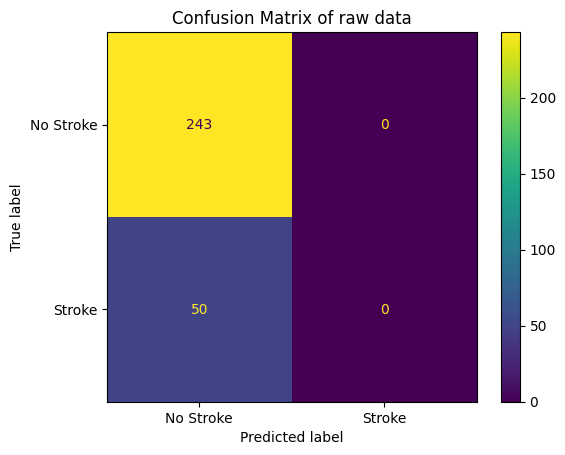

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=np.array([[243, 0], [50, 0]]),
    display_labels=['No Stroke', 'Stroke']
)
disp.plot()
plt.title('Confusion Matrix of raw data')
plt.show()

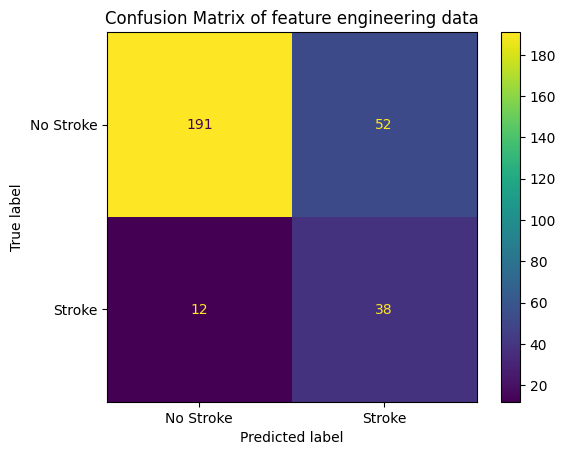

In [48]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.array([[191, 52], [12, 38]]),
    display_labels=['No Stroke', 'Stroke']
)
disp.plot()
plt.title('Confusion Matrix of feature engineering data')
plt.show()